## Cargamos librerías Necesarias

In [153]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from sklearn.linear_model import LinearRegression # Regresion Lineal
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Metricas de evaluacion
from sklearn.model_selection import train_test_split # Particion de datos

## Cargamos la Data

In [154]:
# Cargamos la data
data_frame = pd.read_csv("docs/demo_round_traces.csv", sep=";") # Cargamos el archivo csv
data_frame

Unnamed: 0         Map              Team  InternalTeamId  MatchId  \
0             600  de_inferno         Terrorist               1        4   
1             601  de_inferno         Terrorist               1        4   
2             602  de_inferno         Terrorist               1        4   
3             603  de_inferno         Terrorist               1        4   
4             604  de_inferno         Terrorist               1        4   
...           ...         ...               ...             ...      ...   
79152      123775   de_mirage  CounterTerrorist               2      511   
79153      123776   de_mirage  CounterTerrorist               2      511   
79154      123777   de_mirage  CounterTerrorist               2      511   
79155      123778   de_mirage  CounterTerrorist               2      511   
79156      123779   de_mirage  CounterTerrorist               2      511   

       RoundId            SteamId  RoundWinner  MatchWinner  Survived  ...  \
0            1  76561198036987787        False         True     False  ...   
1            1  76561197971812216        False         True     False  ...   
2            1  76561197972240652        False         True     False  ...   
3            1  76561197975824962        False         True     False  ...   
4            1  76561197960331095        False         True      True  ...   
...        ...                ...          ...          ...       ...  ...   
79152        5  76561198024905796        False        False     False  ...   
79153        5  76561198000020858        False        False     False  ...   
79154        5  76561198013485667        False        False     False  ...   
79155        5  76561197972003061        False        False     False  ...   
79156        5  76561197989744167        False        False      True  ...   

       RoundAssists  RoundHeadshots  RoundFlankKills  \
0                 0               0                0   
1                 0               0                0   
2                 0               0                0   
3                 0               0                0   
4                 0               0                0   
...             ...             ...              ...   
79152             0               0                0   
79153             0               1                0   
79154             0               0                0   
79155             0               0                0   
79156             0               2                0   

       RoundStartingEquipmentValue  TeamStartingEquipmentValue  MatchKills  \
0                              750                        4400           0   
1                              800                        4400           0   
2                             1000                        4400           0   
3                              850                        4400           0   
4                             1000                        4400           0   
...                            ...                         ...         ...   
79152                         5600                       27100           4   
79153                         5500                       27100           8   
79154                         4950                       27100           5   
79155                         4950                       27100           1   
79156                         6100                       27100           5   

       MatchFlankKills  MatchAssists  MatchHeadshots  AvgMatchKillDist  
0                    0             0               0     501379.183091  
1                    0             0               0     208807.587297  
2                    0             0               0     381652.027911  
3                    0             0               0     289754.503091  
4                    0             0               0     254527.691176  
...                ...           ...             ...               ...  
79152                0             2

## Mapa de Calor general
Se utilizará un mapa de calor general para poder escoger con mayor determinación las columnas a trabajar

Text(0.5, 1.0, 'Correlación de Variables')

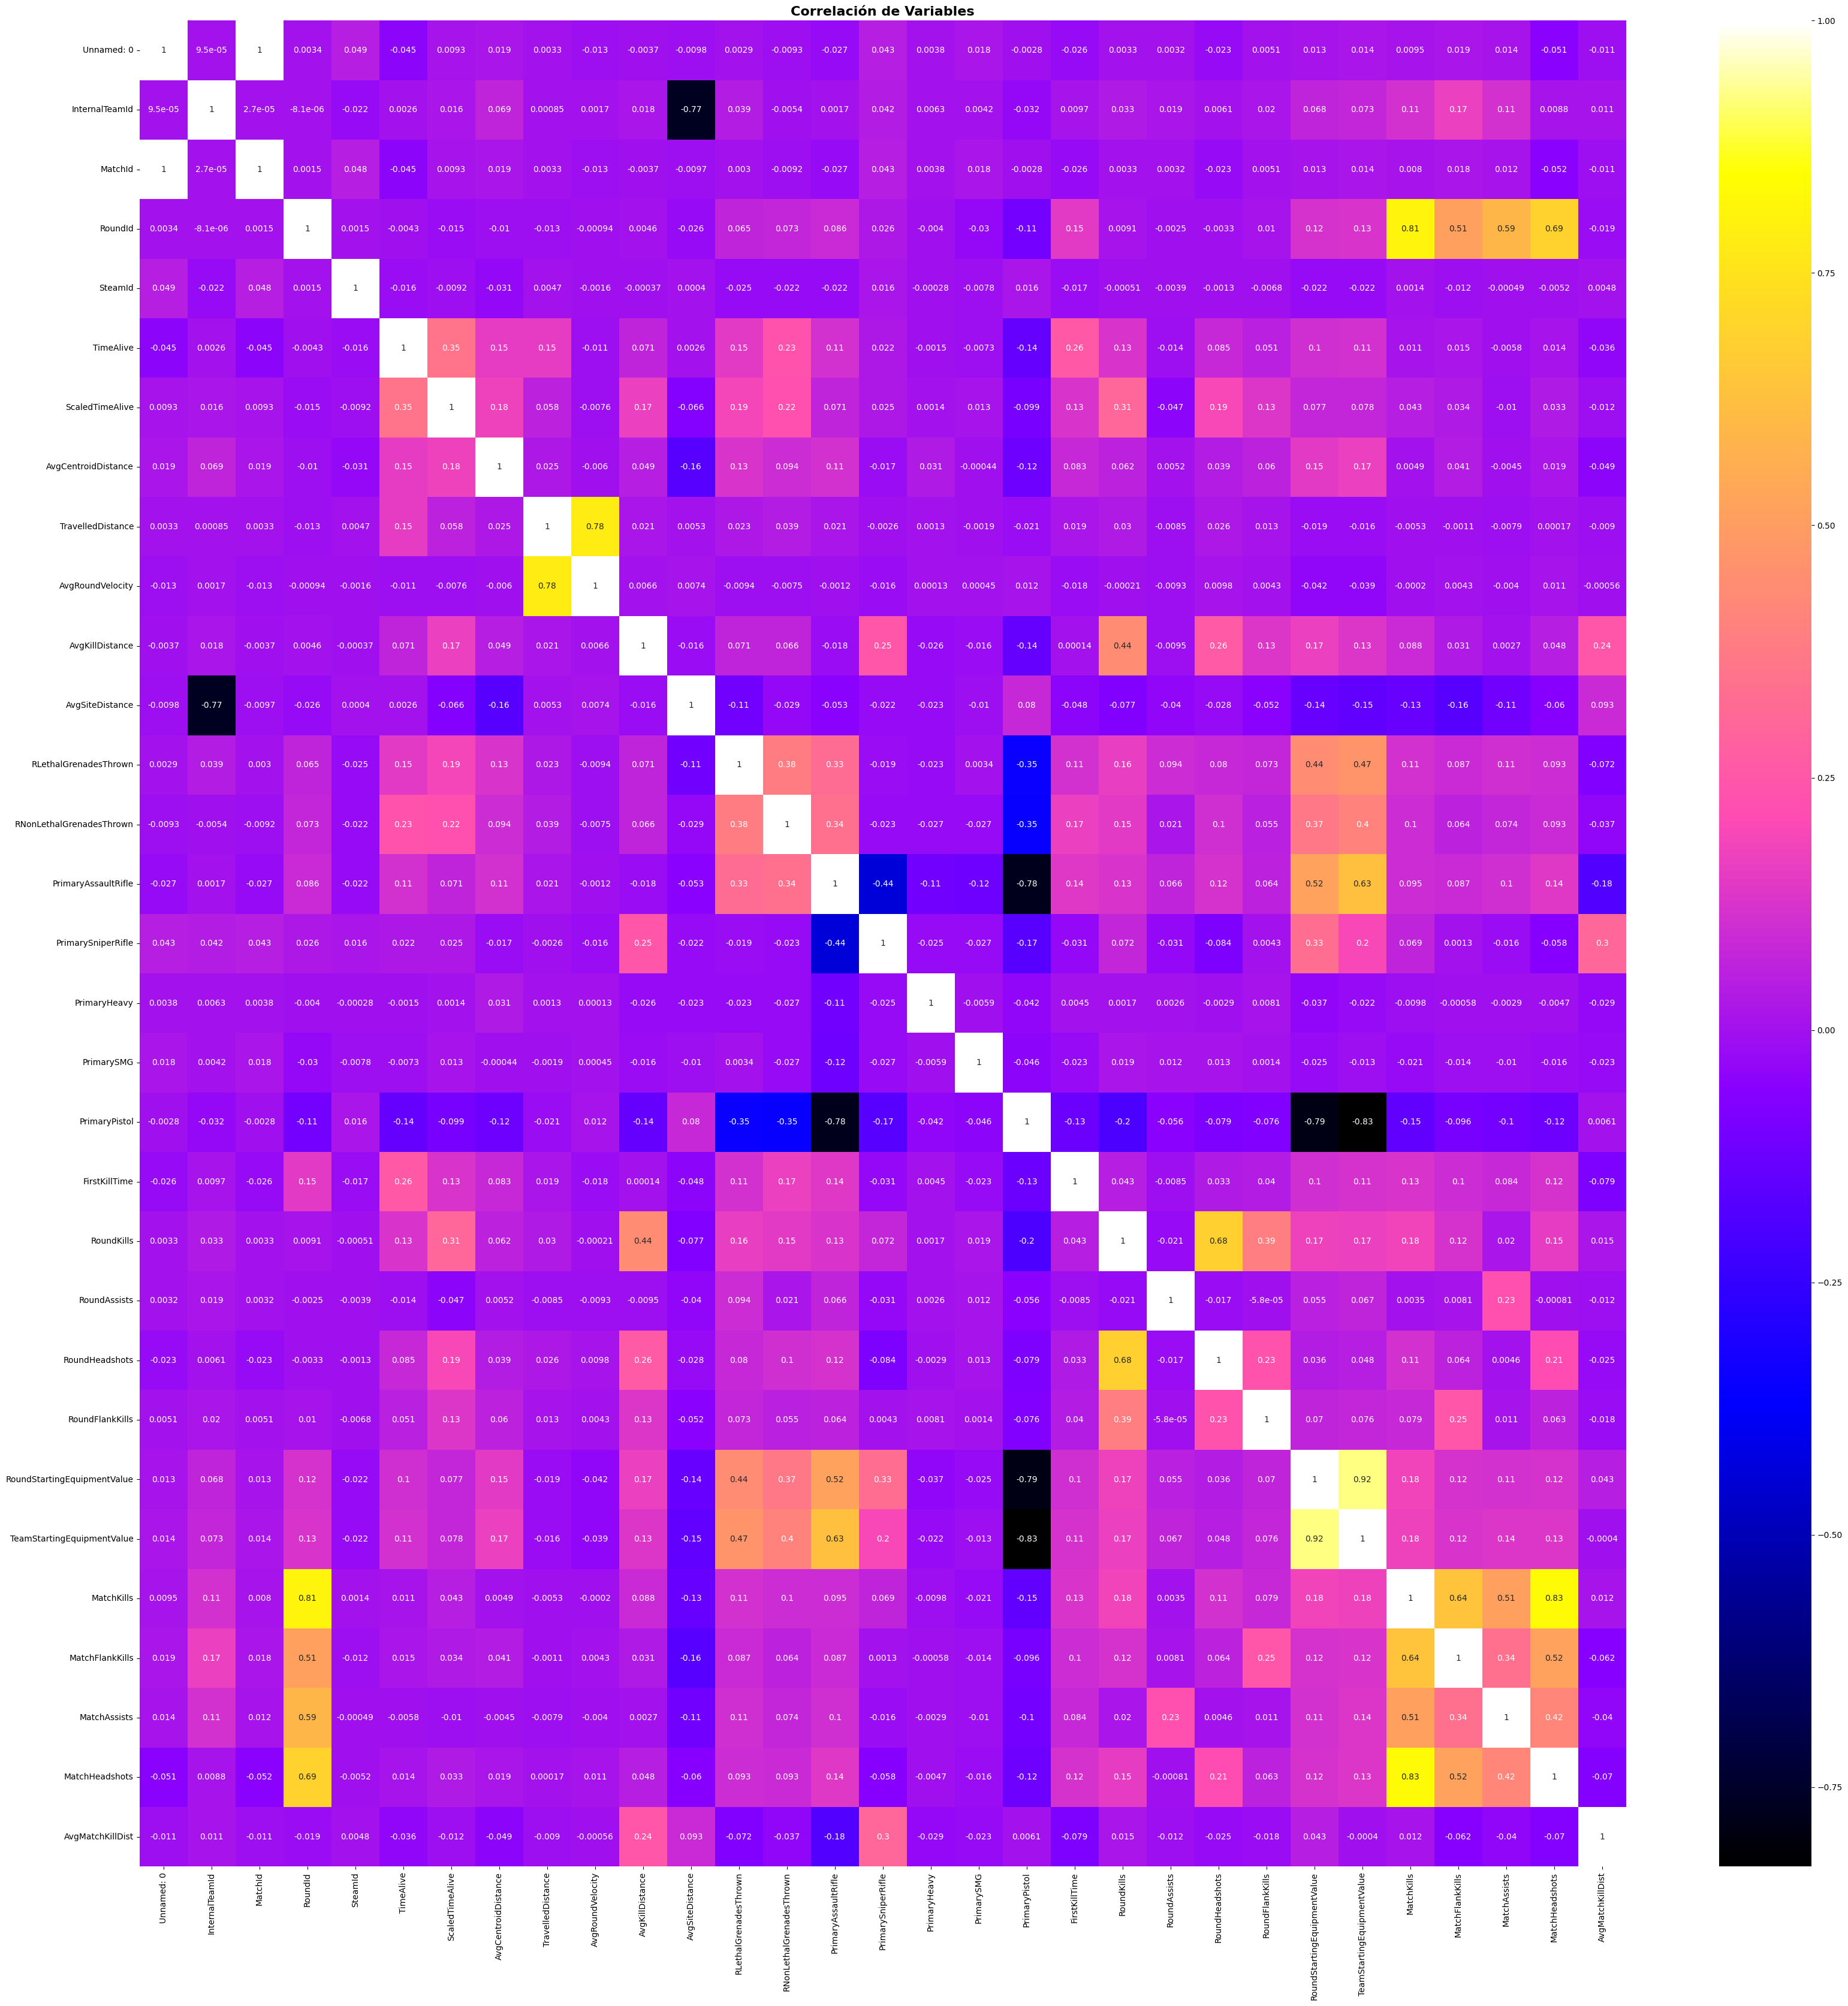

In [155]:
# Creación de un mapa de calor para ver la correlación entre las variables
f, ax = plt.subplots(1, 1, figsize=(40, 40)) # Creamos la figura. 1 fila, 1 columna, tamaño 8x8
ax = sns.heatmap(data_frame[data_frame.describe().columns].corr(), annot=True, cmap='gnuplot2') # Creamos el mapa de calor. El metodo corr() calcula la correlacion entre las variables.
plt.title("Correlación de Variables", fontsize=16, fontweight="bold") # Titulo del grafico

In [156]:
data_frame.columns

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'SteamId', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch',
       'TimeAlive', 'ScaledTimeAlive', 'AvgCentroidDistance',
       'TravelledDistance', 'AvgRoundVelocity', 'AvgKillDistance',
       'AvgSiteDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
       'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy',
       'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills',
       'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'AvgMatchKillDist'],
      dtype='object')

## Seleccionamos columnas más relevantes a utilizar

In [157]:
# Selección de variables a utilizar
df_select = data_frame[['AvgMatchKillDist', 'AvgKillDistance', 'MatchKills', 'RoundStartingEquipmentValue', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
                        'Map', 'Team','TimeAlive', 'RoundKills']]
df_select

AvgMatchKillDist  AvgKillDistance  MatchKills  \
0         501379.183091         0.000000           0   
1         208807.587297         0.000000           0   
2         381652.027911         0.000000           0   
3         289754.503091         0.000000           0   
4         254527.691176         0.000000           0   
...                 ...              ...         ...   
79152     768003.878843         0.000000           4   
79153     692262.605640    109345.366682           8   
79154     161310.783653         0.000000           5   
79155     984575.199373         0.000000           1   
79156     633305.796231    764092.209992           5   

       RoundStartingEquipmentValue  PrimaryAssaultRifle  PrimarySniperRifle  \
0                              750                  0.0                 0.0   
1                              800                  0.0                 0.0   
2                             1000                  0.0                 0.0   
3                              850                  0.0                 0.0   
4                             1000                  0.0                 0.0   
...                            ...                  ...                 ...   
79152                         5600                  1.0                 0.0   
79153                         5500                  1.0                 0.0   
79154                         4950                  1.0                 0.0   
79155                         4950                  0.0                 1.0   
79156                         6100                  1.0                 0.0   

              Map              Team  TimeAlive  RoundKills  
0      de_inferno         Terrorist  51.120249           0  
1      de_inferno         Terrorist  43.486626           0  
2      de_inferno         Terrorist  37.354698           0  
3      de_inferno         Terrorist  47.678861           0  
4      de_inferno         Terrorist  53.122511           0  
...           ...               ...        ...         ...  
79152   de_mirage  CounterTerrorist  34.027207           0  
79153   de_mirage  CounterTerrorist  29.261054           1  
79154   de_mirage  CounterTerrorist  59.147178           0  
79155   de_mirage  CounterTerrorist  42.582843           0  
79156   de_mirage  CounterTerrorist  80.047931           4  

[79157 rows x 10 columns]

## Creamos Mapa de calor
* El propósito es ver la correlación entre la variable objetivo **"AvgMatchKillDist"** y las demás variables

Text(0.5, 1.0, 'Correlación de Variables')

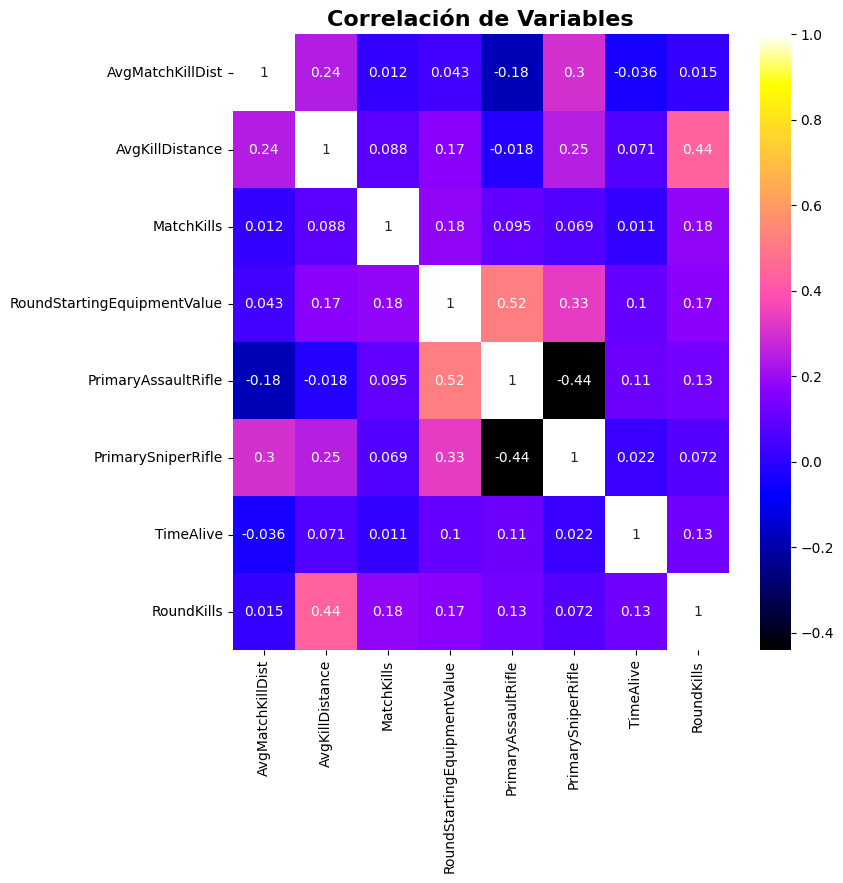

In [158]:
# Creación de un mapa de calor para ver la correlación entre las variables
f, ax = plt.subplots(1, 1, figsize=(8, 8)) # Creamos la figura. 1 fila, 1 columna, tamaño 8x8
ax = sns.heatmap(df_select[df_select.describe().columns].corr(), annot=True, cmap='gnuplot2') # Creamos el mapa de calor. El metodo corr() calcula la correlacion entre las variables.
plt.title("Correlación de Variables", fontsize=16, fontweight="bold") # Titulo del grafico

---

**Análisis**

---

Podemos ver que la variable **"AvgMatchKillDist"** tiene una correlación positiva más fuerte con las variables **"AvgKillDistance"**, **"PrimarySniperRifle"** y una más debil pero igualmente positiva con **"RoundStartingEquipmentValue"**. Esto quiere decir que si estás variables aumentan, por ende, mayor será la distancia promedio entre asesinatos en una partida.


## Primeras Tablas
Utilizaremos las variables positivas más relevantes

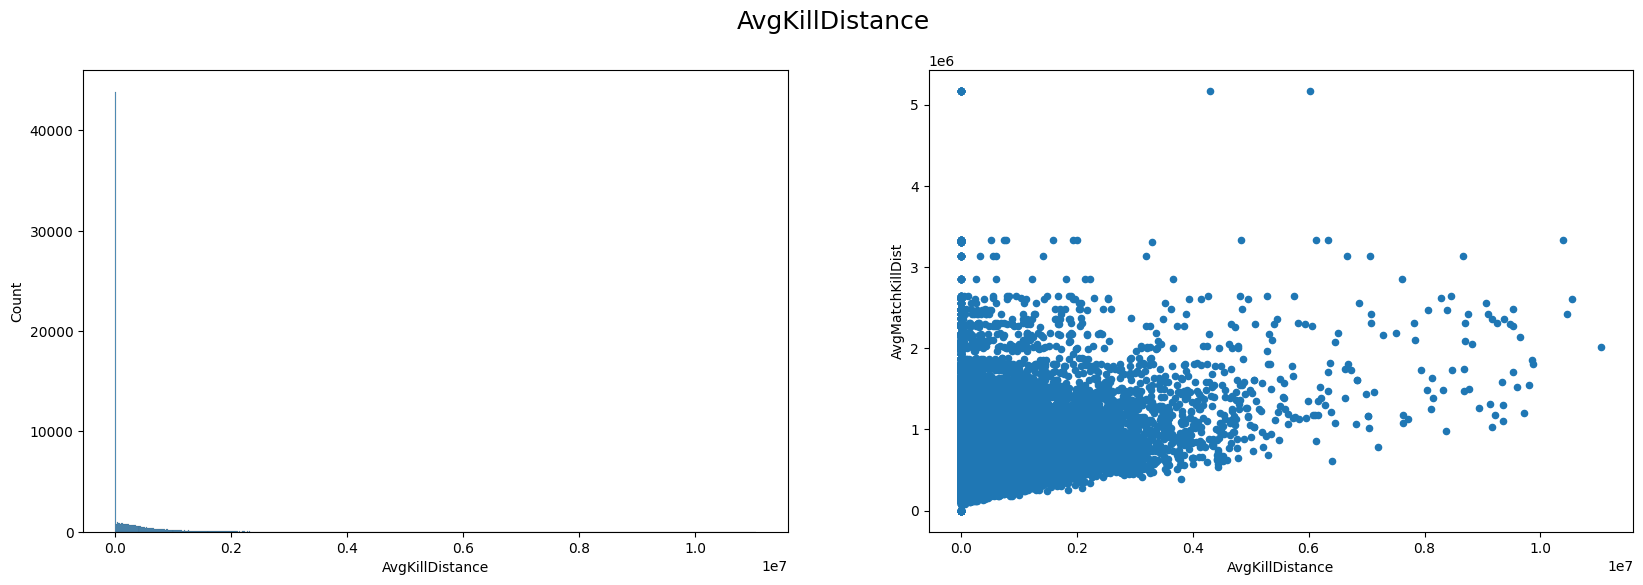

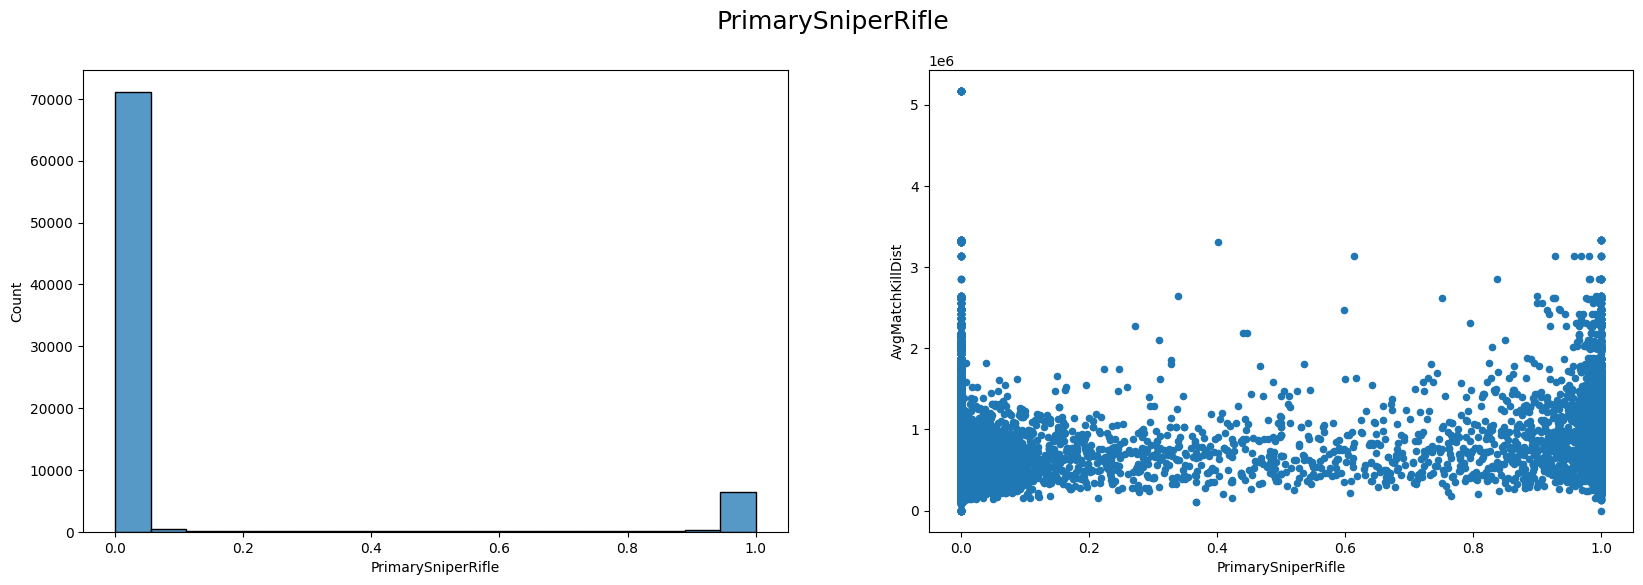

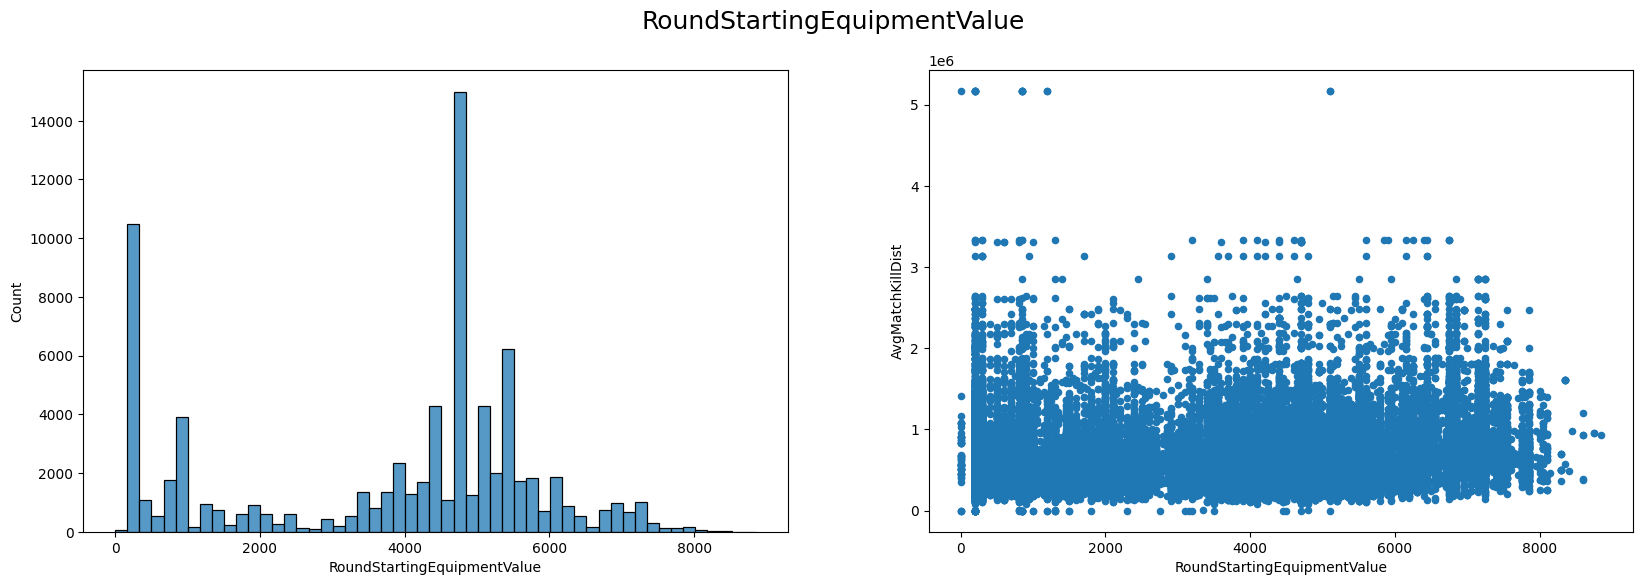

In [159]:
for col in ['AvgKillDistance', 'PrimarySniperRifle', 'RoundStartingEquipmentValue']:
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sns.histplot(data_frame[col], ax=ax[0], kde=False)
    data_frame[[col]+['AvgMatchKillDist']].plot.scatter(x=col, y='AvgMatchKillDist', ax=ax[1])
    plt.show()

## Regresión Lineal

In [160]:
# Separamos la data en dos grupos: X (variables independientes) e y (variable dependiente)
x = df_select[['RoundStartingEquipmentValue', 'PrimarySniperRifle', 'AvgKillDistance']] # Variables predictoras
y = df_select["AvgMatchKillDist"] # Variable a predecir

In [161]:
# Crear el modelo de regresion lineal
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=29) # Particion de los datos. 80% entrenamiento, 20% prueba
# Creamos el modelo
model = LinearRegression()
# Entrenamos el modelo
model.fit(x_train, y_train)
# Validamos el modelo
y_pred = model.predict(x_test)

In [162]:
# Evaluamos el modelo
print(f"R2: {r2_score(y_test, y_pred):.4f}") # Coeficiente de determinacion. Mide la proporcion de la varianza total de la variable dependiente que es explicada por la regresion
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}") # Error cuadratico medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}") # Error absoluto medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"Score del modelo en entrenamiento: {model.score(x_train, y_train):.4f}") # Score del modelo en entrenamiento
print(f"Score del modelo en prueba: {model.score(x_test, y_test):.4f}") # Score del modelo en prueba

R2: 0.1201
MSE: 100840361413.2395
MAE: 220991.4801
Score del modelo en entrenamiento: 0.1297
Score del modelo en prueba: 0.1201


---

**Análisis**

---

* Podemos ver que el $R^{2}$ es de 0.1201, no es suficiente pero es algo por donde empezar.
* El error cuadrático medio es de 100840361413.2395 lo que es muy alto, por lo que no es un buen modelo.
* El error absoluto medio es de 220991.4801 lo que es muy alto, por lo que tambien es indicación de que no es un buen modelo.
* Para mejorar el modelo se considerará incluir variables categóricas.

In [163]:
# Guardamos los resultados del MAE (Error absoluto medio) en una lista
history_mae = []
history_mae.append(mean_absolute_error(y_test, y_pred))

# Guardamos los resultados del R2 (Coeficiente de Determinación) en una lista
history_r2 = []
history_r2.append(model.score(x_train, y_train))

## Transformación de variables categóricas

In [164]:
# Visualizamos las variables categóricas en el dataset
df_select.columns[df_select.dtypes == 'object']

Index(['Map', 'Team'], dtype='object')

In [165]:
# Visualizamos los valores únicos de las variables categóricas
for column in data_frame.columns[data_frame.dtypes == 'object']:
    print(column,"->",data_frame[column].unique())


Map -> ['de_inferno' 'de_nuke' 'de_mirage' 'de_dust2']
Team -> ['Terrorist' 'CounterTerrorist']


Probaremos primero con la variable "Map" y veremos su correlación con "AvgMatchKillDist"

## Tratamiento de variable Map

In [166]:
# Tratamiento variable Map con One-Hot Encoding
data_transform = pd.get_dummies(df_select.Map)
df_select = pd.concat([df_select, data_transform], axis=1)
df_select

AvgMatchKillDist  AvgKillDistance  MatchKills  \
0         501379.183091         0.000000           0   
1         208807.587297         0.000000           0   
2         381652.027911         0.000000           0   
3         289754.503091         0.000000           0   
4         254527.691176         0.000000           0   
...                 ...              ...         ...   
79152     768003.878843         0.000000           4   
79153     692262.605640    109345.366682           8   
79154     161310.783653         0.000000           5   
79155     984575.199373         0.000000           1   
79156     633305.796231    764092.209992           5   

       RoundStartingEquipmentValue  PrimaryAssaultRifle  PrimarySniperRifle  \
0                              750                  0.0                 0.0   
1                              800                  0.0                 0.0   
2                             1000                  0.0                 0.0   
3                              850                  0.0                 0.0   
4                             1000                  0.0                 0.0   
...                            ...                  ...                 ...   
79152                         5600                  1.0                 0.0   
79153                         5500                  1.0                 0.0   
79154                         4950                  1.0                 0.0   
79155                         4950                  0.0                 1.0   
79156                         6100                  1.0                 0.0   

              Map              Team  TimeAlive  RoundKills  de_dust2  \
0      de_inferno         Terrorist  51.120249           0     False   
1      de_inferno         Terrorist  43.486626           0     False   
2      de_inferno         Terrorist  37.354698           0     False   
3      de_inferno         Terrorist  47.678861           0     False   
4      de_inferno         Terrorist  53.122511           0     False   
...           ...               ...        ...         ...       ...   
79152   de_mirage  CounterTerrorist  34.027207           0     False   
79153   de_mirage  CounterTerrorist  29.261054           1     False   
79154   de_mirage  CounterTerrorist  59.147178           0     False   
79155   de_mirage  CounterTerrorist  42.582843           0     False   
79156   de_mirage  CounterTerrorist  80.047931           4     False   

       de_inferno  de_mirage  de_nuke  
0            True      False    False  
1            True      False    False  
2            True      False    False  
3            True      False    False  
4            True      False    False  
...           ...        ...      ...  
79152       False       True    False  
79153       False       True    False  
79154       False       True    False  
79155       False       True    False  
79156       False       True    False  

[79157 rows x 14 columns]

In [167]:
# Tratamiento variable Map con One-Hot Encoding. Convertimos los valores True or False en 1 y 0
df_select["de_dust2"] = df_select["de_dust2"].astype(int)
df_select["de_inferno"] = df_select["de_inferno"].astype(int)
df_select["de_mirage"] = df_select["de_mirage"].astype(int)
df_select["de_nuke"] = df_select["de_nuke"].astype(int)

df_select

AvgMatchKillDist  AvgKillDistance  MatchKills  \
0         501379.183091         0.000000           0   
1         208807.587297         0.000000           0   
2         381652.027911         0.000000           0   
3         289754.503091         0.000000           0   
4         254527.691176         0.000000           0   
...                 ...              ...         ...   
79152     768003.878843         0.000000           4   
79153     692262.605640    109345.366682           8   
79154     161310.783653         0.000000           5   
79155     984575.199373         0.000000           1   
79156     633305.796231    764092.209992           5   

       RoundStartingEquipmentValue  PrimaryAssaultRifle  PrimarySniperRifle  \
0                              750                  0.0                 0.0   
1                              800                  0.0                 0.0   
2                             1000                  0.0                 0.0   
3                              850                  0.0                 0.0   
4                             1000                  0.0                 0.0   
...                            ...                  ...                 ...   
79152                         5600                  1.0                 0.0   
79153                         5500                  1.0                 0.0   
79154                         4950                  1.0                 0.0   
79155                         4950                  0.0                 1.0   
79156                         6100                  1.0                 0.0   

              Map              Team  TimeAlive  RoundKills  de_dust2  \
0      de_inferno         Terrorist  51.120249           0         0   
1      de_inferno         Terrorist  43.486626           0         0   
2      de_inferno         Terrorist  37.354698           0         0   
3      de_inferno         Terrorist  47.678861           0         0   
4      de_inferno         Terrorist  53.122511           0         0   
...           ...               ...        ...         ...       ...   
79152   de_mirage  CounterTerrorist  34.027207           0         0   
79153   de_mirage  CounterTerrorist  29.261054           1         0   
79154   de_mirage  CounterTerrorist  59.147178           0         0   
79155   de_mirage  CounterTerrorist  42.582843           0         0   
79156   de_mirage  CounterTerrorist  80.047931           4         0   

       de_inferno  de_mirage  de_nuke  
0               1          0        0  
1               1          0        0  
2               1          0        0  
3               1          0        0  
4               1          0        0  
...           ...        ...      ...  
79152           0          1        0  
79153           0          1        0  
79154           0          1        0  
79155           0          1        0  
79156           0          1        0  

[79157 rows x 14 columns]

## Mapa de Calor V2
* Se incluyen los mapas en el mapa de calor como variable categorica

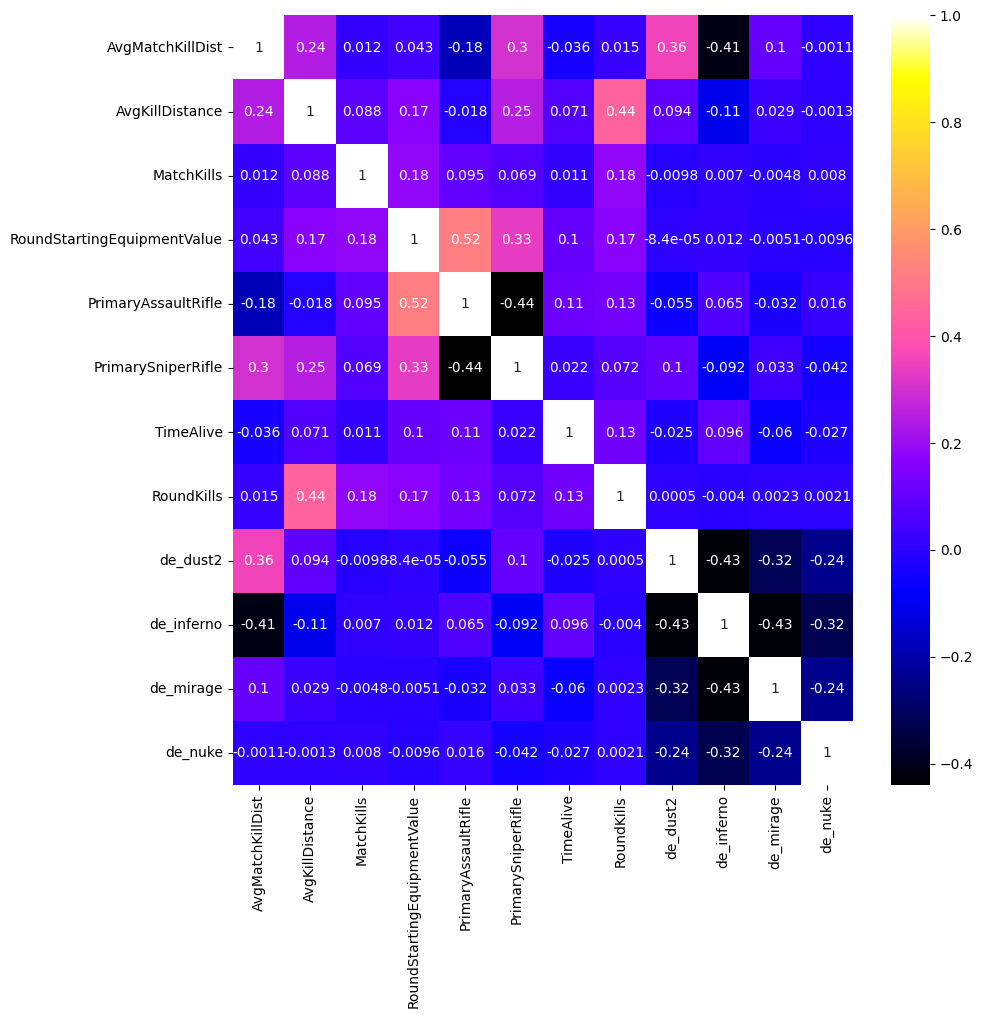

In [168]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df_select[df_select.describe().columns].corr(), annot=True, cmap='gnuplot2')

---

**Análisis**

---

Al agregar los mapas notamos que la correlación entre **"AvgMatchKillDist"** y el mapa **"de_dust2"** es bastante alta, en comparación a los demás. Esto puede hacer que el modelo mejore.

## Regresión Lineal con Variable Map

In [169]:
# Separamos la data en dos grupos: X (variables independientes) e y (variable dependiente)
x = df_select[['RoundStartingEquipmentValue', 'PrimarySniperRifle', 'AvgKillDistance', "de_dust2", "de_inferno", "de_mirage", "de_nuke"]] # Variables predictoras
y = df_select["AvgMatchKillDist"] # Variable a predecir

In [170]:
# Crear el modelo de regresion lineal
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=29) # Particion de los datos. 80% entrenamiento, 20% prueba
# Creamos el modelo
model = LinearRegression()
# Entrenamos el modelo
model.fit(x_train, y_train)
# Validamos el modelo
y_pred = model.predict(x_test)

In [171]:
# Evaluamos el modelo
print(f"R2: {r2_score(y_test, y_pred):.4f}") # Coeficiente de determinacion. Mide la proporcion de la varianza total de la variable dependiente que es explicada por la regresion
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}") # Error cuadratico medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}") # Error absoluto medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"Score del modelo en entrenamiento: {model.score(x_train, y_train):.4f}") # Score del modelo en entrenamiento
print(f"Score del modelo en prueba: {model.score(x_test, y_test):.4f}") # Score del modelo en prueba

R2: 0.2920
MSE: 81144927710.3093
MAE: 191696.3762
Score del modelo en entrenamiento: 0.2941
Score del modelo en prueba: 0.2920


---

**Análisis**

---

* Podemos ver que el $R^{2}$ aumentó desde 0.1201 a 0.2920, lo que es un buen avance.
* El error cuadrático medio disminuyó a 81144927710.3093, aunque sigue siendo muy alto, por lo que no es un buen modelo.
* El error absoluto medio disminuyó a 191696.3762 lo que es un buen avance, pero sigue siendo muy alto, por lo que tampoco es un buen modelo.
* Se incluirá la variable categórica "Team" para ver si mejora el modelo.

In [172]:
# Guardamos los resultados del MAE (Error absoluto medio) en una lista
history_mae.append(mean_absolute_error(y_pred, y_test))

# Guardamos los resultados del R2 (Coeficiente de Determinación) en una lista
history_r2.append(model.score(x_train, y_train))

## Tratamiento de variable Team
Veremos si la variable "Team" tiene correlación con "AvgMatchKillDist". Puede que los equipos tengan un mejor desempeño en ciertos mapas.

In [173]:
# Tratamiento variable Team con One-Hot Encoding
data_transform = pd.get_dummies(df_select.Team)
df_select = pd.concat([df_select, data_transform], axis=1)
df_select

AvgMatchKillDist  AvgKillDistance  MatchKills  \
0         501379.183091         0.000000           0   
1         208807.587297         0.000000           0   
2         381652.027911         0.000000           0   
3         289754.503091         0.000000           0   
4         254527.691176         0.000000           0   
...                 ...              ...         ...   
79152     768003.878843         0.000000           4   
79153     692262.605640    109345.366682           8   
79154     161310.783653         0.000000           5   
79155     984575.199373         0.000000           1   
79156     633305.796231    764092.209992           5   

       RoundStartingEquipmentValue  PrimaryAssaultRifle  PrimarySniperRifle  \
0                              750                  0.0                 0.0   
1                              800                  0.0                 0.0   
2                             1000                  0.0                 0.0   
3                              850                  0.0                 0.0   
4                             1000                  0.0                 0.0   
...                            ...                  ...                 ...   
79152                         5600                  1.0                 0.0   
79153                         5500                  1.0                 0.0   
79154                         4950                  1.0                 0.0   
79155                         4950                  0.0                 1.0   
79156                         6100                  1.0                 0.0   

              Map              Team  TimeAlive  RoundKills  de_dust2  \
0      de_inferno         Terrorist  51.120249           0         0   
1      de_inferno         Terrorist  43.486626           0         0   
2      de_inferno         Terrorist  37.354698           0         0   
3      de_inferno         Terrorist  47.678861           0         0   
4      de_inferno         Terrorist  53.122511           0         0   
...           ...               ...        ...         ...       ...   
79152   de_mirage  CounterTerrorist  34.027207           0         0   
79153   de_mirage  CounterTerrorist  29.261054           1         0   
79154   de_mirage  CounterTerrorist  59.147178           0         0   
79155   de_mirage  CounterTerrorist  42.582843           0         0   
79156   de_mirage  CounterTerrorist  80.047931           4         0   

       de_inferno  de_mirage  de_nuke  CounterTerrorist  Terrorist  
0               1          0        0             False       True  
1               1          0        0             False       True  
2               1          0        0             False       True  
3               1          0        0             False       True  
4               1          0        0             False       True  
...           ...        ...      ...               ...        ...  
79152           0          1        0              True      False  
79153           0          1        0              True      False  
79154           0          1        0              True      False  
79155           0          1        0              True      False  
79156           0          1        0              True      False  

[79157 rows x 16 columns]

In [174]:
# Tratamiento variable Team con One-Hot Encoding. Convertimos los valores True or False en 1 y 0
df_select["CounterTerrorist"] = df_select["CounterTerrorist"].astype(int)
df_select["Terrorist"] = df_select["Terrorist"].astype(int)
df_select

AvgMatchKillDist  AvgKillDistance  MatchKills  \
0         501379.183091         0.000000           0   
1         208807.587297         0.000000           0   
2         381652.027911         0.000000           0   
3         289754.503091         0.000000           0   
4         254527.691176         0.000000           0   
...                 ...              ...         ...   
79152     768003.878843         0.000000           4   
79153     692262.605640    109345.366682           8   
79154     161310.783653         0.000000           5   
79155     984575.199373         0.000000           1   
79156     633305.796231    764092.209992           5   

       RoundStartingEquipmentValue  PrimaryAssaultRifle  PrimarySniperRifle  \
0                              750                  0.0                 0.0   
1                              800                  0.0                 0.0   
2                             1000                  0.0                 0.0   
3                              850                  0.0                 0.0   
4                             1000                  0.0                 0.0   
...                            ...                  ...                 ...   
79152                         5600                  1.0                 0.0   
79153                         5500                  1.0                 0.0   
79154                         4950                  1.0                 0.0   
79155                         4950                  0.0                 1.0   
79156                         6100                  1.0                 0.0   

              Map              Team  TimeAlive  RoundKills  de_dust2  \
0      de_inferno         Terrorist  51.120249           0         0   
1      de_inferno         Terrorist  43.486626           0         0   
2      de_inferno         Terrorist  37.354698           0         0   
3      de_inferno         Terrorist  47.678861           0         0   
4      de_inferno         Terrorist  53.122511           0         0   
...           ...               ...        ...         ...       ...   
79152   de_mirage  CounterTerrorist  34.027207           0         0   
79153   de_mirage  CounterTerrorist  29.261054           1         0   
79154   de_mirage  CounterTerrorist  59.147178           0         0   
79155   de_mirage  CounterTerrorist  42.582843           0         0   
79156   de_mirage  CounterTerrorist  80.047931           4         0   

       de_inferno  de_mirage  de_nuke  CounterTerrorist  Terrorist  
0               1          0        0                 0          1  
1               1          0        0                 0          1  
2               1          0        0                 0          1  
3               1          0        0                 0          1  
4               1          0        0                 0          1  
...           ...        ...      ...               ...        ...  
79152           0          1        0                 1          0  
79153           0          1        0                 1          0  
79154           0          1        0                 1          0  
79155           0          1        0                 1          0  
79156           0          1        0                 1          0  

[79157 rows x 16 columns]

## Mapa de Calor V3
* Se incluye variable categórica Team

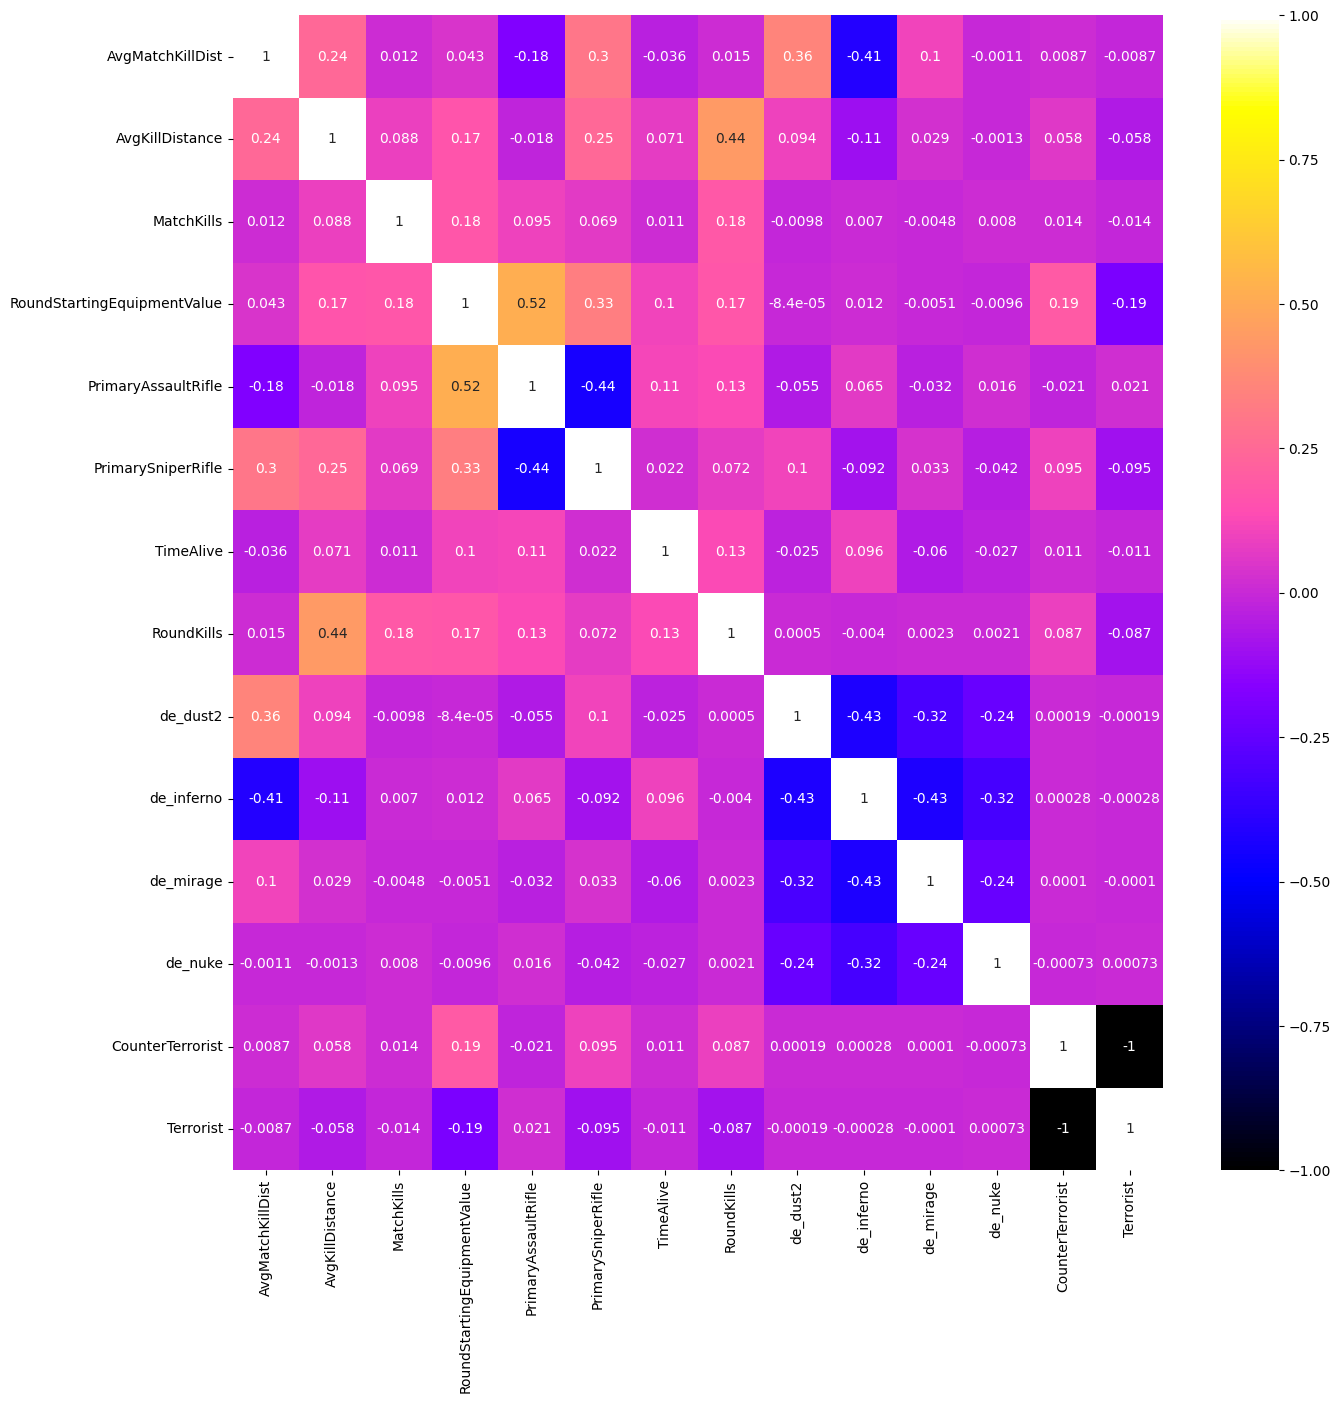

In [175]:
f, ax = plt.subplots(1, 1, figsize=(15, 15))
ax = sns.heatmap(df_select[df_select.describe().columns].corr(), annot=True, cmap='gnuplot2')

---

**Análisis**

---

Al agregar las variables de equipo nuevamente vemos que la correlación con AvgMatchKillDist bastante es baja, suponemos que no afectará mucho al modelo.

## Regresión Lineal con variable Team

In [176]:
# Separamos la data en dos grupos: X (variables independientes) e y (variable dependiente)
x = df_select[['RoundStartingEquipmentValue', 'PrimarySniperRifle', 'AvgKillDistance', "de_dust2", "de_inferno", "de_mirage", "de_nuke", "CounterTerrorist", "Terrorist"]] # Variables predictoras
y = df_select["AvgMatchKillDist"] # Variable a predecir

In [177]:
# Crear el modelo de regresion lineal
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=29) # Particion de los datos. 80% entrenamiento, 20% prueba
# Creamos el modelo
model = LinearRegression()
# Entrenamos el modelo
model.fit(x_train, y_train)
# Validamos el modelo
y_pred = model.predict(x_test)

In [178]:
# Evaluamos el modelo
print(f"R2: {r2_score(y_test, y_pred):.4f}") # Coeficiente de determinacion. Mide la proporcion de la varianza total de la variable dependiente que es explicada por la regresion
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}") # Error cuadratico medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}") # Error absoluto medio. Mide la diferencia entre los valores predichos y los valores observados
print(f"Score del modelo en entrenamiento: {model.score(x_train, y_train):.4f}") # Score del modelo en entrenamiento
print(f"Score del modelo en prueba: {model.score(x_test, y_test):.4f}") # Score del modelo en prueba

R2: 0.2921
MSE: 81126882851.4048
MAE: 191630.6718
Score del modelo en entrenamiento: 0.2942
Score del modelo en prueba: 0.2921


---

**Análisis**

---

* Esta vez, como habiamos pensado, el $R^{2}$ aumentó de forma minima a 0.2921. Los equipos no afectan practicamente en nada.
* El error cuadrático medio aumentó a 81126882851.4048 debido a la inclusión de la variable categórica "Team".
* El error absoluto medio aumentó a 191630.6718 igualmente producto de la inclusión de la variable categórica "Team".
* Se incluirá la variable categórica "Team" para ver si mejora el modelo.